# Linear Regression Project

**CaseStudy -:**Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.let's find out...!

**Importing modules which are neccessary for our analysis**

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the Dataset and calling the head of the Dataset**

In [2]:
customers=pd.read_csv("Ecommerce-Customers")

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Note

- There no units given therefore considering units of Time on App,Time on Website and Avg. Session Length as Seconds

- Length of Membership as days

**Information of Dataset**

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Descriptive Statistics of our Dataset**

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis


**This is the jointplot to compare the Times on Website and Yearly Amount Spent Columns**

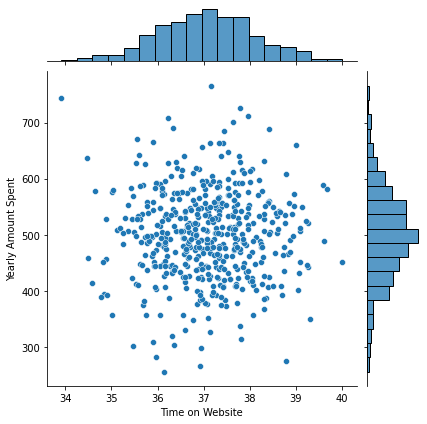

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**This is the jointplot to compare the Times on Website and Yearly Amount Spent Columns with 'hex' kind.**

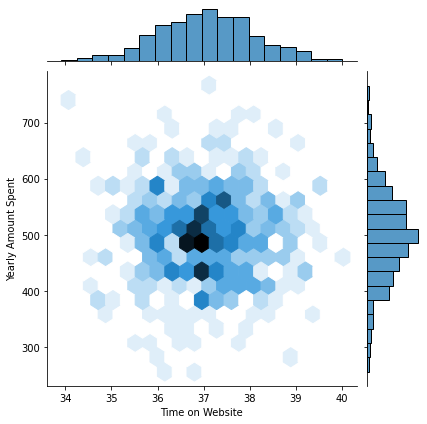

In [38]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent',kind='hex')

**This is the jointplot to compare the Times on App and Yearly Amount Spent Columns**

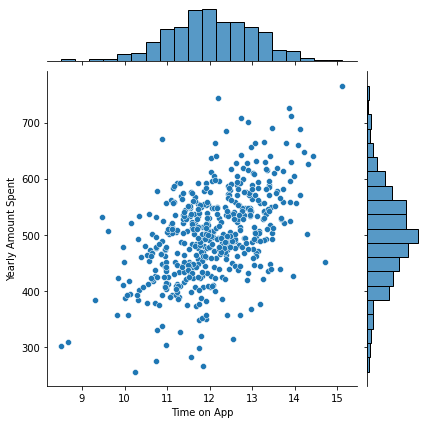

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

- Here data is linear(Time on App vs Yearly Amount Spent)

**This is the jointplot to compare the Times on App and Yearly Amount Spent Columns with 'hex' kind.**

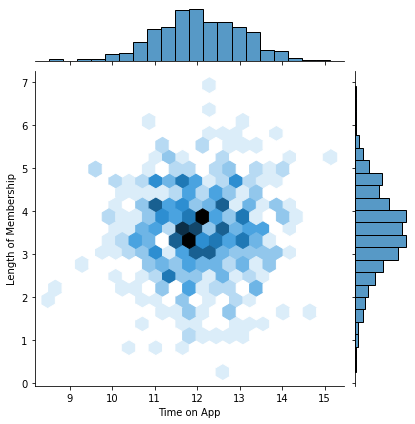

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

**Pairplot**

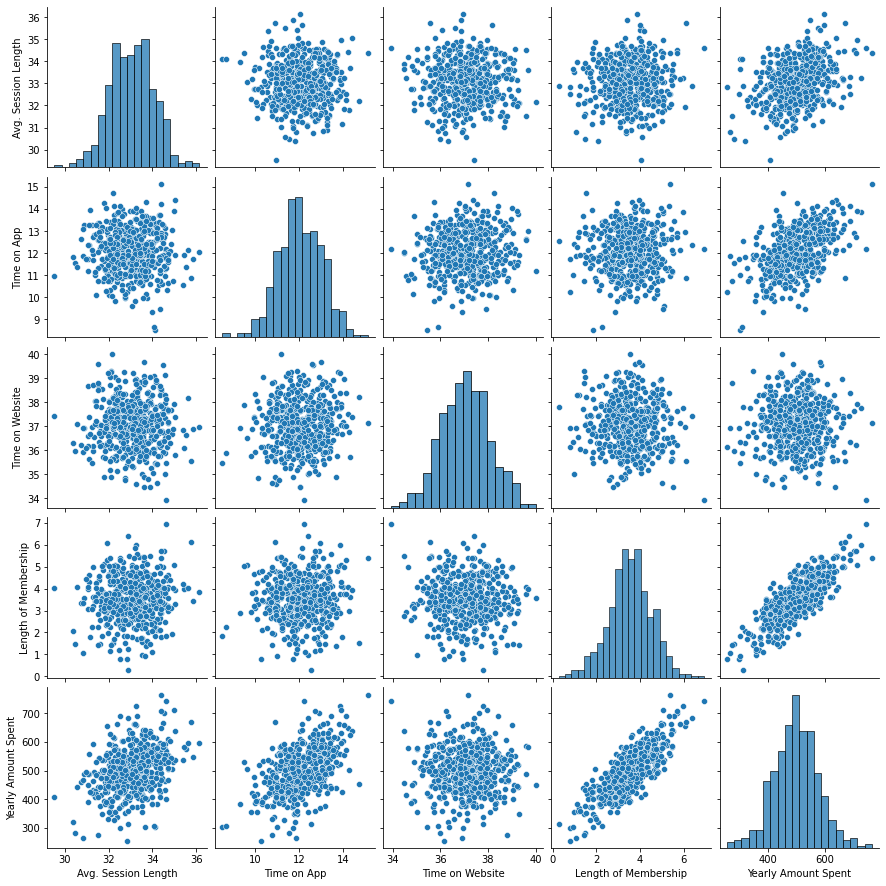

In [11]:
sns.pairplot(customers)

- Length of Membership has a high correlation with Yearly Amount Spent

**This is the Linear Model Plot to check the Linearity between Yearly Amount Spent and Length of Membership**

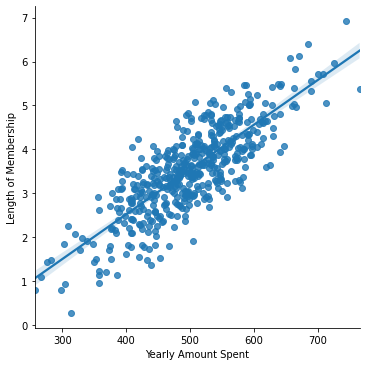

In [12]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

## Building a Linear Regression Model

**Dividing Dataset into Features and Labels**

In [13]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [14]:
# DIVIDE THE DATASET INTO X & Y
x = customers.iloc[:,3:-1]
y = customers.iloc[:,-1]

**Applying Train_test_split i.e Splitting Dataset into Traing set and Testing Set**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)

## Training the Model

**Step1-: import model**

In [17]:
from sklearn.linear_model import LinearRegression

**Step2-: create an object for model**

In [18]:
linreg=LinearRegression()

**Step3-: train the model**

- ie finding the value of m & c

In [19]:
linreg.fit(xtrain,ytrain)

LinearRegression()

**Coefficient of the model**

In [20]:
linreg.coef_


array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

**Step 4-: predict the test set and save it in ypred and print ypred**

In [21]:
ypred = linreg.predict(xtest)

In [22]:
print(ypred)

[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472.52458887
 501.82927633 4

**Creating a scatterplot of the real test values versus the predicted values.**

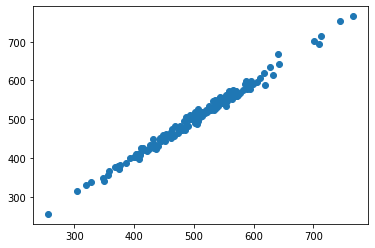

In [23]:
plt.scatter(ytest,ypred)

**Model Evaluation**

In [50]:
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score

In [51]:
print(f"Mean Squared Error      -:{mse(ytest,ypred)}")
print(f"Root Mean Squared Error -:{np.sqrt(mse(ytest,ypred))}")
print(f"Mean Absolute Error     -:{mae(ytest,ypred)}")
print(f"R2_score                -:{r2_score(ytest,ypred)}")

Mean Squared Error      -:79.81305165097382
Root Mean Squared Error -:8.933815066978598
Mean Absolute Error     -:7.2281486534308135
R2_score                -:0.9890046246741235


**Ploting a histogram of the residuals**

c:\users\student\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

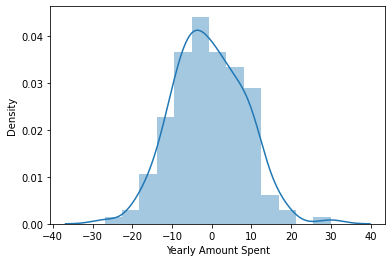

In [36]:
sns.distplot(ytest-ypred)

- it is normally distributed

**Creating The Coefficients DataFrame**

In [27]:
x=customers.iloc[:,3:-1]
y=customers.iloc[:,-1]

In [28]:
coef_df = pd.DataFrame(linreg.coef_,x.columns,columns=['Coefficients'])

In [29]:
coef_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Interpreting Coefficients**

- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.981550 seconds

- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.590159 seconds

- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.190405 seconds

- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.279097 days

<AxesSubplot:>

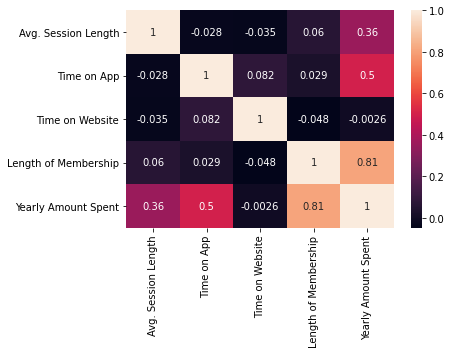

In [48]:
sns.heatmap(customers.corr(),annot=True)

### Conclusion

**By the above analysis done,we conclude that,**
- A unit change in time on website is associated with an increase of 0.190405 seconds and a unit change in time on app is associated with an increase of 38.590159 seconds

- Correlation between length in membership w.r.t yearly amount spent is higher i.e if length of membership is more yearly amount spend is more

- Correlation between time on website is less as compare to time on app w.r.t to yearly amount spent

### Solution

- In the light of evidence, we came to a result that they must focus the App 